In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### download

In [8]:
dtypes = {}
dtypes['ip'] = 'uint32'
dtypes['app'] = 'uint16'
dtypes['device'] = 'uint16'
dtypes['os'] = 'uint16'
dtypes['channel'] = 'uint16'
dtypes['is_attributed'] = 'uint8'
dtypes['click_id'] = 'uint32'
usecols=['ip','app','device','os', 'channel', 'click_time', 'is_attributed']
train_data = pd.read_csv('../data/download/train.csv', dtype=dtypes, usecols=usecols)
train_data['click_time'] = pd.to_datetime(train_data['click_time'])
train_data['hour'] = train_data['click_time'].map(lambda x : x.hour)
train_data['keep_hour'] = train_data['hour'].isin([4,5,9,10,13,14])
train_data['keep_row'] = train_data['click_time'] > '2017-11-08 12:00:00'
train_data['keep'] = train_data['keep_row'] + train_data['keep_hour']
train_data = train_data[train_data['keep'] > 0]
train_data['click_id'] = train_data.index
train_data.head()

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '+' operator is not supported by numexpr for the bool dtype, use '|' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


,ip,app,device,os,channel,click_time,is_attributed,hour,keep_hour,keep_row,keep,click_id
0,83230,3,1,13,379,2017-11-06 14:32:21,0,14,True,False,True,0
1,17357,3,1,19,379,2017-11-06 14:33:34,0,14,True,False,True,1
2,35810,3,1,13,379,2017-11-06 14:34:12,0,14,True,False,True,2
3,45745,14,1,13,478,2017-11-06 14:34:52,0,14,True,False,True,3
4,161007,3,1,13,379,2017-11-06 14:35:08,0,14,True,False,True,4


In [9]:
dtypes = {}
dtypes['ip'] = 'uint32'
dtypes['app'] = 'uint16'
dtypes['device'] = 'uint16'
dtypes['os'] = 'uint16'
dtypes['channel'] = 'uint16'
dtypes['click_id'] = 'uint32'
usecols=['click_id','ip','app','device','os','channel','click_time']
test_data = pd.read_csv('../data/download/test.csv', dtype=dtypes, usecols=usecols)
test_data['click_time'] = pd.to_datetime(test_data['click_time'])
test_data.head()

,click_id,ip,app,device,os,channel,click_time
0,0,5744,9,1,3,107,2017-11-10 04:00:00
1,1,119901,9,1,3,466,2017-11-10 04:00:00
2,2,72287,21,1,19,128,2017-11-10 04:00:00
3,3,78477,15,1,13,111,2017-11-10 04:00:00
4,4,123080,12,1,13,328,2017-11-10 04:00:00


### distribution

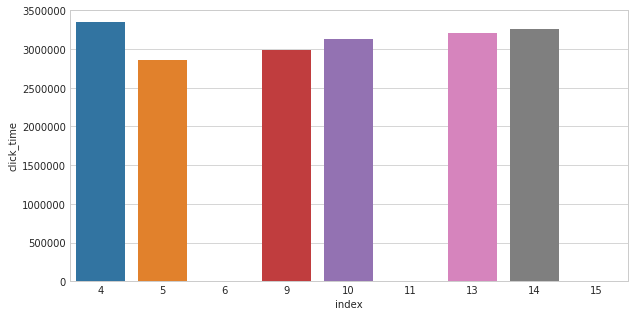

In [10]:
test_hour = test_data['click_time'].map(lambda x : x.hour)
hour = test_hour.value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(x='index', y='click_time', data=hour)
plt.show()

### validation split

In [11]:
train_data['valid_date'] = train_data['click_time'] > '2017-11-09'
train_data['is_valid'] = train_data['valid_date'] * train_data['keep_hour']
valid_data = train_data[train_data['is_valid'] == True]
train_data = train_data[train_data['is_valid'] == False]
train_data = train_data.drop(['valid_date','is_valid'], axis=1)
valid_data = valid_data.drop(['valid_date','is_valid'], axis=1)
train_data = train_data.drop(['keep_row','keep','keep_hour'], axis=1)
valid_data = valid_data.drop(['keep_row','keep','keep_hour'], axis=1)
print('train data:', train_data.shape, train_data['is_attributed'].mean())
print('valid data:', valid_data.shape, valid_data['is_attributed'].mean())

/home/ubuntu/anaconda3/envs/python3/lib/python3.6/site-packages/pandas/core/computation/expressions.py:179: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


train data: (88734191, 9) 0.0024185942034452086
valid data: (20895641, 9) 0.0024990858141178823


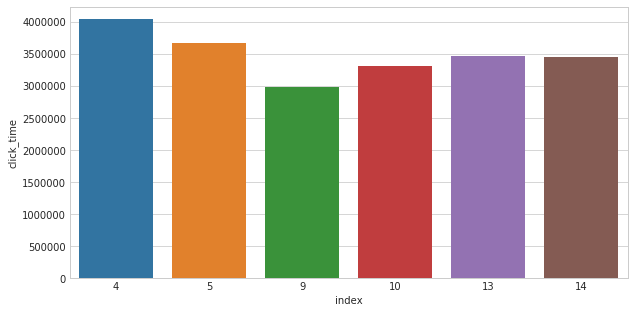

In [12]:
valid_hour = valid_data['click_time'].map(lambda x : x.hour)
hour = valid_hour.value_counts().reset_index()
plt.figure(figsize=(10,5))
sns.set_style("whitegrid")
sns.barplot(x='index', y='click_time', data=hour)
plt.show()

In [13]:
train_data['day'] = train_data['click_time'].dt.day
valid_data['day'] = valid_data['click_time'].dt.day
train_data = train_data[['click_id','is_attributed','day','hour','ip','app','os','device','channel']]
valid_data = valid_data[['click_id','is_attributed','day','hour','ip','app','os','device','channel']]

In [18]:
train_data = train_data.reset_index(drop=True)
valid_data = valid_data.reset_index(drop=True)

In [19]:
train_data.to_feather('../data/data/files/train_data.feather')
valid_data.to_feather('../data/data/files/valid_data.feather')

### test data

In [20]:
test_data['day'] = test_data['click_time'].dt.day
test_data['hour'] = test_data['click_time'].dt.hour
test_data = test_data[['click_id','day','hour','ip','app','os','device','channel']]
test_data.to_feather('../data/data/files/score_data.feather')